In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
from scipy import stats as sts

# №1


А)
Функция правдоподобия будет выглядеть как: $L=\frac{9}{n} \prod\limits_{i=1}^9 (1-\frac{i-1}{n})$,
где $i$ - номер заказа, а множитель $\frac{9}{n}$ отвечает за успешное повторение. Теперь в виде кода:

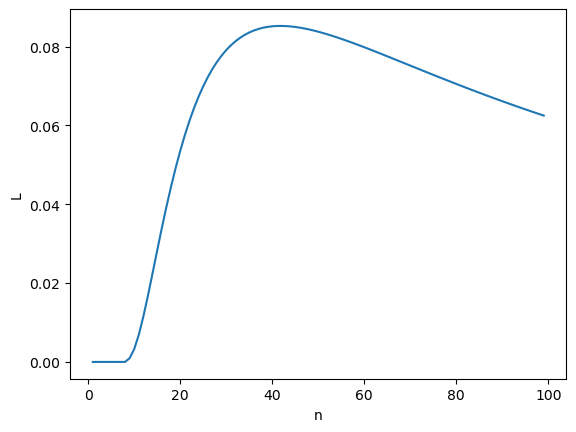

In [68]:
def calc_L(n, i=10):
    product = 1
    for j in range(1, i):
        product *= (1 - (j-1)/n)
    L = (i-1)/n * product
    return L
#Соответственно, график:
x = [n for n in range(1,100)]
y = [calc_L(n, 10) for n in x]
plt.xlabel('n')
plt.ylabel('L')
plt.plot(x, y)

In [69]:
#Оценка
x[y.index(max(y))]

42

Б) К уже полученной функции правдоподобия добавляем номер повторяющегося заказа и получаем: $E(k)=\sum\limits_{k=1}^\infty [ k \frac{k-1}{n} \prod\limits_{i=1}^{k-1} (1-\frac{i-1}{n})]$. Код:

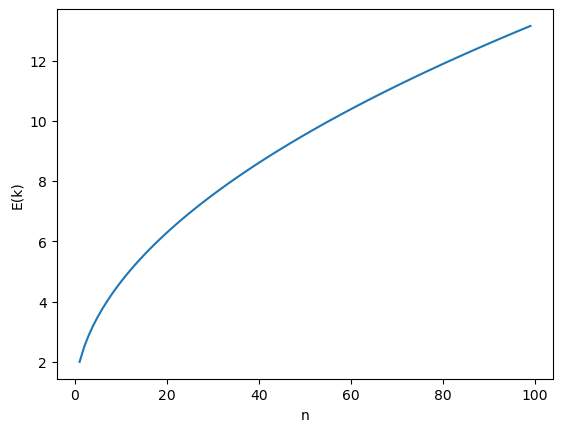

In [147]:
def calc_E(n):
    k = 2
    sm = 0    
    while True:
        product = 1
        for i in range(1, k):
            product *= (1 - (i-1)/n)
        term = k * (k - 1) / n * product
        if term < 1e-6:
            break
        sm += term
        k += 1    
    return sm
x = [n for n in range(1,100)]
y = [calc_E(n) for n in x]
plt.xlabel('n')
plt.ylabel('E(k)')
plt.plot(x, y)

In [76]:
#Оценка
a = [(b - 10)**2 for b in y]
x[a.index(min(a))]

55

В) Модель:

In [51]:
np.random.seed(2021)
names = [i for i in range(100)]
k_list = [] #номера первых повторных заказов
for i in range (10000):
    taxis = [] #поездки симуляции
    while True:
        new_taxi = np.random.choice(names)
        taxis.append(new_taxi)
        if taxis.count(new_taxi) > 1:
            break
    k_list.append(len(taxis))
k_list[:20]

[15, 17, 20, 14, 7, 9, 13, 11, 15, 3, 4, 12, 13, 7, 17, 13, 15, 8, 8, 16]

In [82]:
#Оценки
mm = []
ml = []
x = [n for n in range(1,400)]
for k in k_list:    
    y = [calc_L(n, k) for n in x]
    ml.append(x[y.index(max(y))])
    y1 = [calc_E(n) for n in x]
    a = [(b - k)**2 for b in y1]    
    mm.append(x[a.index(min(a))])
print(ml[:10])
print(mm[:10])

[100, 130, 183, 86, 19, 33, 74, 51, 100, 2]
[131, 170, 238, 113, 25, 44, 97, 68, 131, 3]


In [119]:
df = pd.DataFrame(np.array([k_list, ml, mm]).T, columns=['k','ML', 'MM'])
df

,k,ML,MM
0,15,100,131
1,17,130,170
2,20,183,238
3,14,86,113
4,7,19,25
...,...,...,...
9995,8,25,34
9996,3,2,3
9997,14,86,113
9998,12,62,82


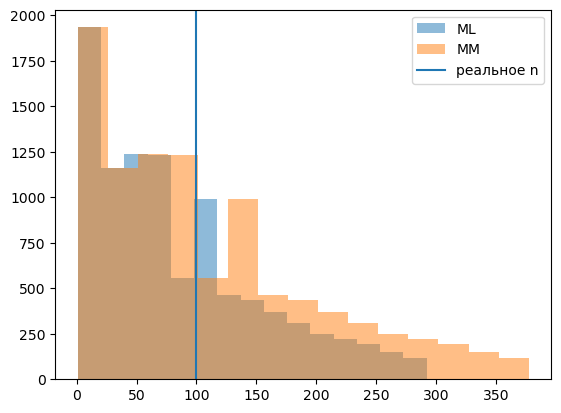

In [120]:
df = df[df['MM']!=399] #удаляем выбросы
plt.hist(df['ML'], bins=15, alpha=0.5, label='ML')
plt.hist(df['MM'], bins=15, alpha=0.5, label='MM')
plt.axvline(100, label='реальное n')
plt.legend()


In [123]:
df['MM'].mean()

110.37094425956738

In [117]:
mm_dev = df['MM'].mean() - 100
ml_dev = df['ML'].mean() - 100
mm_var = df['MM'].var()
ml_var = df['ML'].var()
mm_mse = sum([(100-a)**2 for a in df['MM']])/len(df)
ml_mse = sum([(100-a)**2 for a in df['ML']])/len(df)
df = pd.DataFrame([[mm_dev, ml_dev],
                   [mm_var,ml_var],
                   [mm_mse, ml_mse]], index=['Смещение', 'Дисперсия', 'MSE'], columns=['MM','ML'])
df

,MM,ML
Смещение,10.370944,-15.571027
Дисперсия,8272.731341,4971.332864
MSE,8379.427517,5213.272775


# №2

А) Функцию правдоподобия задаем сразу кодом:

In [131]:
def calc_L1(k,n):
    left = 1
    for i in range(1,k):
        left *= 1-i/n
    right = 0
    comb = list(combinations_with_replacement([n for n in range(1,k+1)],10-k))
    for item in comb:
        base = 1
        for num in item:
            base *= num/n
        right += base
    L = left*right
    return L

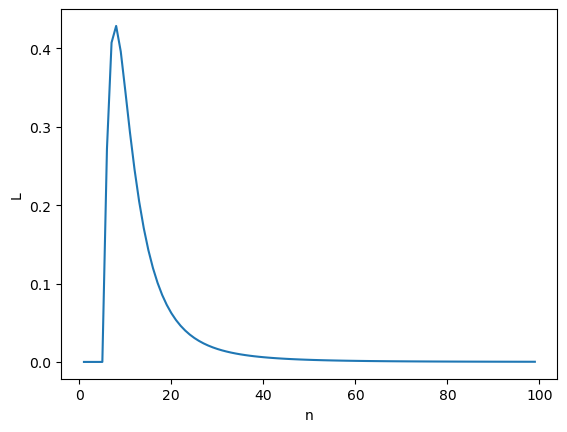

In [142]:
#График
x = [n for n in range(1,100)]
y = [calc_L1(6, n) for n in x]
plt.xlabel('n')
plt.ylabel('L')
plt.plot(x, y)

In [146]:
#Оценка
x[y.index(max(y))]

8

Б) Матожидание:

In [152]:
def calc_E1(n):
    sm = 0
    for k in range (1,11):
        sm += k*calc_L1(k,n)
    return sm

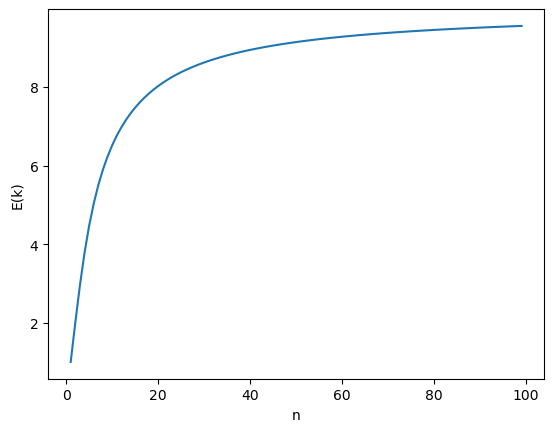

In [160]:
#График
x = [n for n in range(1,100)]
y = [calc_E1(n) for n in x]
plt.xlabel('n')
plt.ylabel('E(k)')
plt.plot(x, y)

In [164]:
#Оценка
a = [(b - 6)**2 for b in y]
x[a.index(min(a))]

8

В) Примерно тот же код, что в первой задаче:

In [172]:
#Модель
np.random.seed(2021)
names = [i for i in range(20)]
k_list = [] #количества уникальных имен
for i in range (10000):
    taxis = [] #поездки симуляции
    for j in range (10):
        new_taxi = np.random.choice(names)
        taxis.append(new_taxi)
    k_list.append(len(set(taxis)))
k_list[:20]

[7, 8, 8, 9, 8, 7, 7, 9, 9, 8, 10, 8, 9, 9, 9, 9, 7, 9, 8, 7]

In [177]:
#Оценки
mm = []
ml = []
x = [n for n in range(1,100)]
for k in k_list:    
    y = [calc_L1(k,n) for n in x]
    ml.append(x[y.index(max(y))])
    y1 = [calc_E1(n) for n in x]
    a = [(b - k)**2 for b in y1]    
    mm.append(x[a.index(min(a))])
print(ml[:10])
print(mm[:10])

[12, 19, 19, 42, 19, 12, 12, 42, 42, 19]
[12, 20, 20, 42, 20, 12, 12, 42, 42, 20]


In [205]:
df = pd.DataFrame(np.array([k_list, ml, mm]).T, columns=['k','ML', 'MM'])
df = df[df['MM']!=99]
df

,k,ML,MM
0,7,12,12
1,8,19,20
2,8,19,20
3,9,42,42
4,8,19,20
...,...,...,...
9995,7,12,12
9996,8,19,20
9997,8,19,20
9998,9,42,42


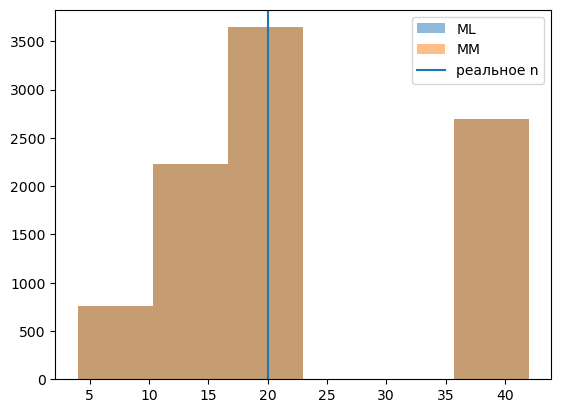

In [206]:
plt.hist(df['ML'], bins=6, alpha=0.5, label='ML')
plt.hist(df['MM'], bins=6, alpha=0.5, label='MM')
plt.axvline(20, label='реальное n')
plt.legend()

In [207]:

mm_dev = df['MM'].mean() - 20
ml_dev = df['ML'].mean() - 20
mm_var = df['MM'].var()
ml_var = df['ML'].var()
mm_mse = sum([(20-a)**2 for a in df['MM']])/len(df)
ml_mse = sum([(20-a)**2 for a in df['ML']])/len(df)
df = pd.DataFrame([[mm_dev, ml_dev],
                   [mm_var,ml_var],
                   [mm_mse, ml_mse]], index=['Смещение', 'Дисперсия', 'MSE'], columns=['MM','ML'])
df

,MM,ML
Смещение,3.441277,3.041899
Дисперсия,155.434875,158.666876
MSE,167.260609,167.903022


# №3

А) Для начала создадим функцию для бутстрэпа t-статистики. Я немного поленился и попросил о помощи гпт:

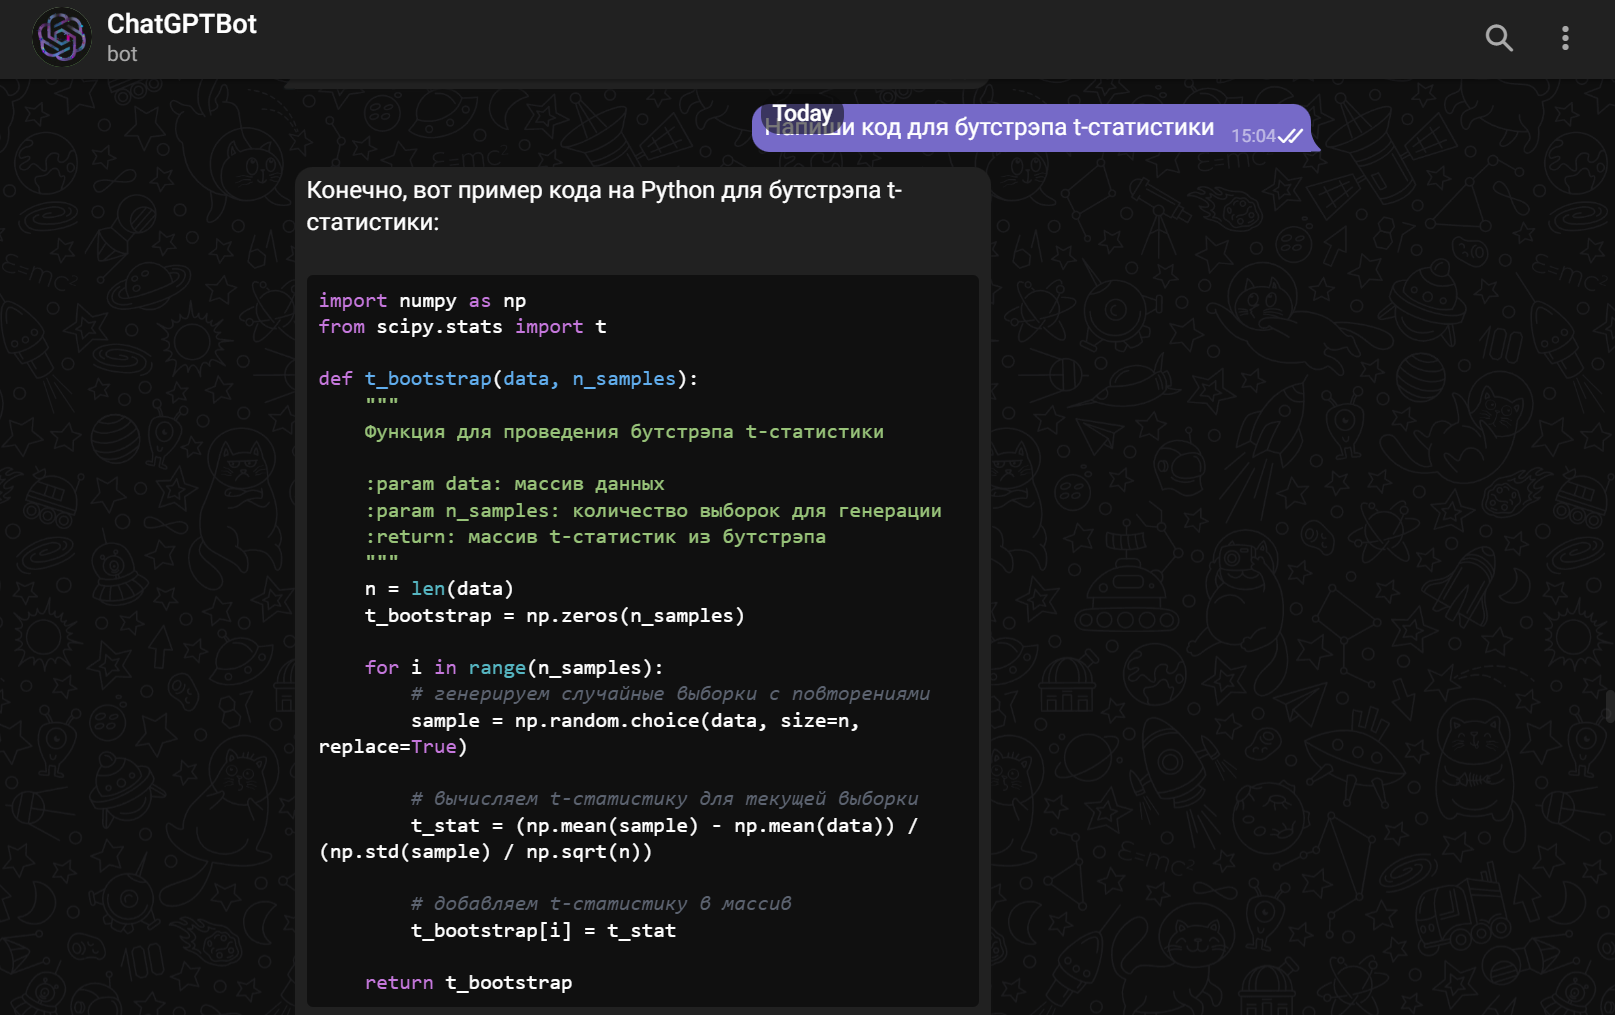

In [214]:
def t_bootstrap_ci(data, n_samples, alpha=0.05):
    n = len(data)
    t_bootstrap = np.zeros(n_samples)  
    for i in range(n_samples):
        sample = np.random.choice(data, size=n, replace=True)
        t_stat = (np.mean(sample) - np.mean(data)) / (np.std(sample) / np.sqrt(n))
        t_bootstrap[i] = t_stat
    quantiles = np.percentile(t_bootstrap, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    ci_lower = np.mean(data) + quantiles[0] * np.std(data) / np.sqrt(n)
    ci_upper = np.mean(data) + quantiles[1] * np.std(data) / np.sqrt(n)
    
    return (ci_lower, ci_upper)

In [223]:
#Модель
np.random.seed(2021)
z_true = 0
nb_true = 0
tb_true = 0
for i in range(10000):
    data = np.random.exponential(1, 20)
    z_obs = [data.mean()-1.96*data.std()/np.sqrt(20), data.mean()+1.96*data.std()/np.sqrt(20)]
    nb_obs = sts.bootstrap((data,), np.mean, confidence_level=0.95, method='percentile')
    tb_obs = t_bootstrap_ci(data, 100)
    if z_obs[0]<1 and z_obs[1]>1:
        z_true+=1
    if nb_obs.confidence_interval[0]<1 and nb_obs.confidence_interval[1]>1:
        nb_true+=1
    if tb_obs[0]<1 and tb_obs[1]>1:
        tb_true+=1

In [224]:
#Вероятность накрытия для нормального интервала:
z_true/10000

0.9019

In [225]:
#для наивного бутстрэпа:
nb_true/10000

0.9057

In [226]:
#для бутстрэпа t-статистики
tb_true/10000

0.8794

Б) Делаем практически то же самое:

In [234]:
np.random.seed(2021)
z_true = 0
nb_true = 0
tb_true = 0
for i in range(10000):
    data = np.random.standard_t(3, 20)
    z_obs = [data.mean()-1.96*data.std()/np.sqrt(20), data.mean()+1.96*data.std()/np.sqrt(20)]
    nb_obs = sts.bootstrap((data,), np.mean, confidence_level=0.95, method='percentile')
    tb_obs = t_bootstrap_ci(data, 100)
    if z_obs[0]<0 and z_obs[1]>0:
        z_true+=1
    if nb_obs.confidence_interval[0]<0 and nb_obs.confidence_interval[1]>0:
        nb_true+=1
    if tb_obs[0]<0 and tb_obs[1]>0:
        tb_true+=1

In [235]:
#Вероятность накрытия для нормального интервала:
z_true/10000

0.9363

In [236]:
#для наивного бутстрэпа:
nb_true/10000

0.9204

In [237]:
#для бутстрэпа t-статистики
tb_true/10000

0.9595

В) Для экспоненциального распределения лучше себя показали нормальный интервал и наивный бутстрэп с небольшим отличием. Причем даже они не достигли отметки в 95%. Для распределения Стьюдента существенно лучше подошел бутстрэп t-статистики, так как распределение Стьюдента симметрично.

# №4

In [81]:
df = pd.read_csv("exam.csv")
df = df.drop_duplicates(subset=['Last name'])
df = df.set_index(['Last name']).drop(columns=['num'])

In [72]:
letters = 'А, Е, Ё, И, Й, О, У, Ы, Э, Ю, Я'

In [73]:
v_list = []
c_list = []
for item in list(df.index):
    if item[0] in letters:
        v_list.append(df['res'][item])
    else:
        c_list.append(df['res'][item])

А) На 5% уровне значимости гипотеза не отвергается:

In [74]:
sts.ttest_ind(v_list, c_list, equal_var=False)[1]

0.4539632351248388

Б) На 5% уровне значимости гипотеза не отвергается:

In [79]:
def get_mean_difference(sample1, sample2, axis=None):
    return np.mean(sample1, axis=axis) - np.mean(sample2, axis=axis)

for i in range(400, 500):
    bootstrap_stats = sts.bootstrap((v_list, c_list), get_mean_difference, confidence_level=1 - i/1000, method='percentile')
    p_value = i/1000
    if bootstrap_stats.confidence_interval[0] > 0 or bootstrap_stats.confidence_interval[1] < 0:
        break
p_val

0.449

В) На 5% уровне значимости гипотеза не отвергается:

In [80]:
def t_bootstrap1(x, y, n_bootstraps):
    n_x = len(x)
    n_y = len(y)
    t_stat = np.mean(x) - np.mean(y)
    combined = np.concatenate((x, y))
    t_bootstraps = np.zeros(n_bootstraps)
    for i in range(n_bootstraps):
        resampled = np.random.choice(combined, size=n_x+n_y, replace=True)
        x_star = resampled[:n_x]
        y_star = resampled[n_x:]
        t_bootstraps[i] = np.mean(x_star) - np.mean(y_star)
    p_value = np.sum(np.abs(t_bootstraps) >= np.abs(t_stat)) / n_bootstraps
    return p_value
t_bootstrap1(c_list, v_list, 10000)

0.4386

Г) На 5% уровне значимости гипотеза не отвергается:

In [82]:
sts.permutation_test((c_list, v_list), statistic=means_dif, vectorized=True).pvalue

0.439

# №5

In [85]:
median = df['res'].median()
median

18.0

In [87]:
vowel_good = 0
vowel_bad = 0
consonant_good = 0
consonant_bad = 0
for item in v_list:
    if item>median:
        vowel_good+=1
    else:
        vowel_bad+=1
for item in c_list:
    if item>median:
        consonant_good+=1
    else:
        consonant_bad+=1
df1 = pd.DataFrame([[consonant_good,consonant_bad], 
                    [vowel_good,vowel_bad]], columns=['good', 'bad'], index=['consonant', 'vowel'])
df1


,good,bad
consonant,120,157
vowel,19,27


# №7

Попробуем научить чат гпт решать номер 2 контрольной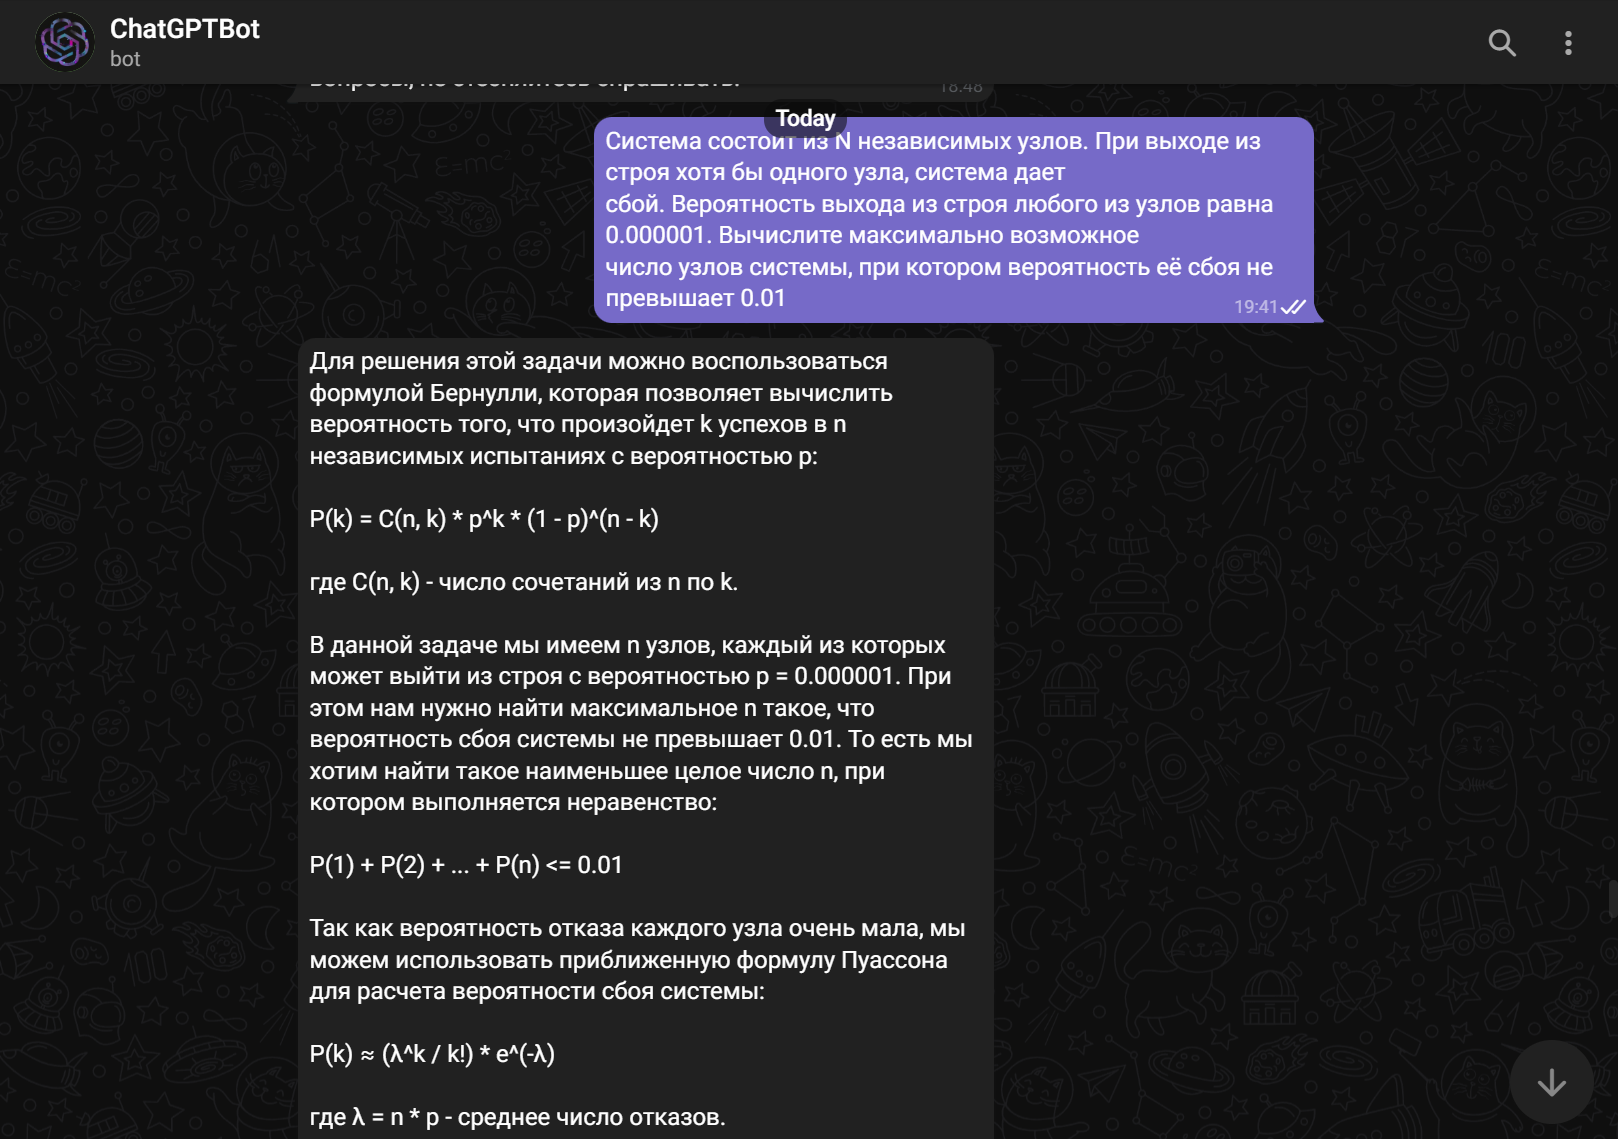 1 (2016-2017) 


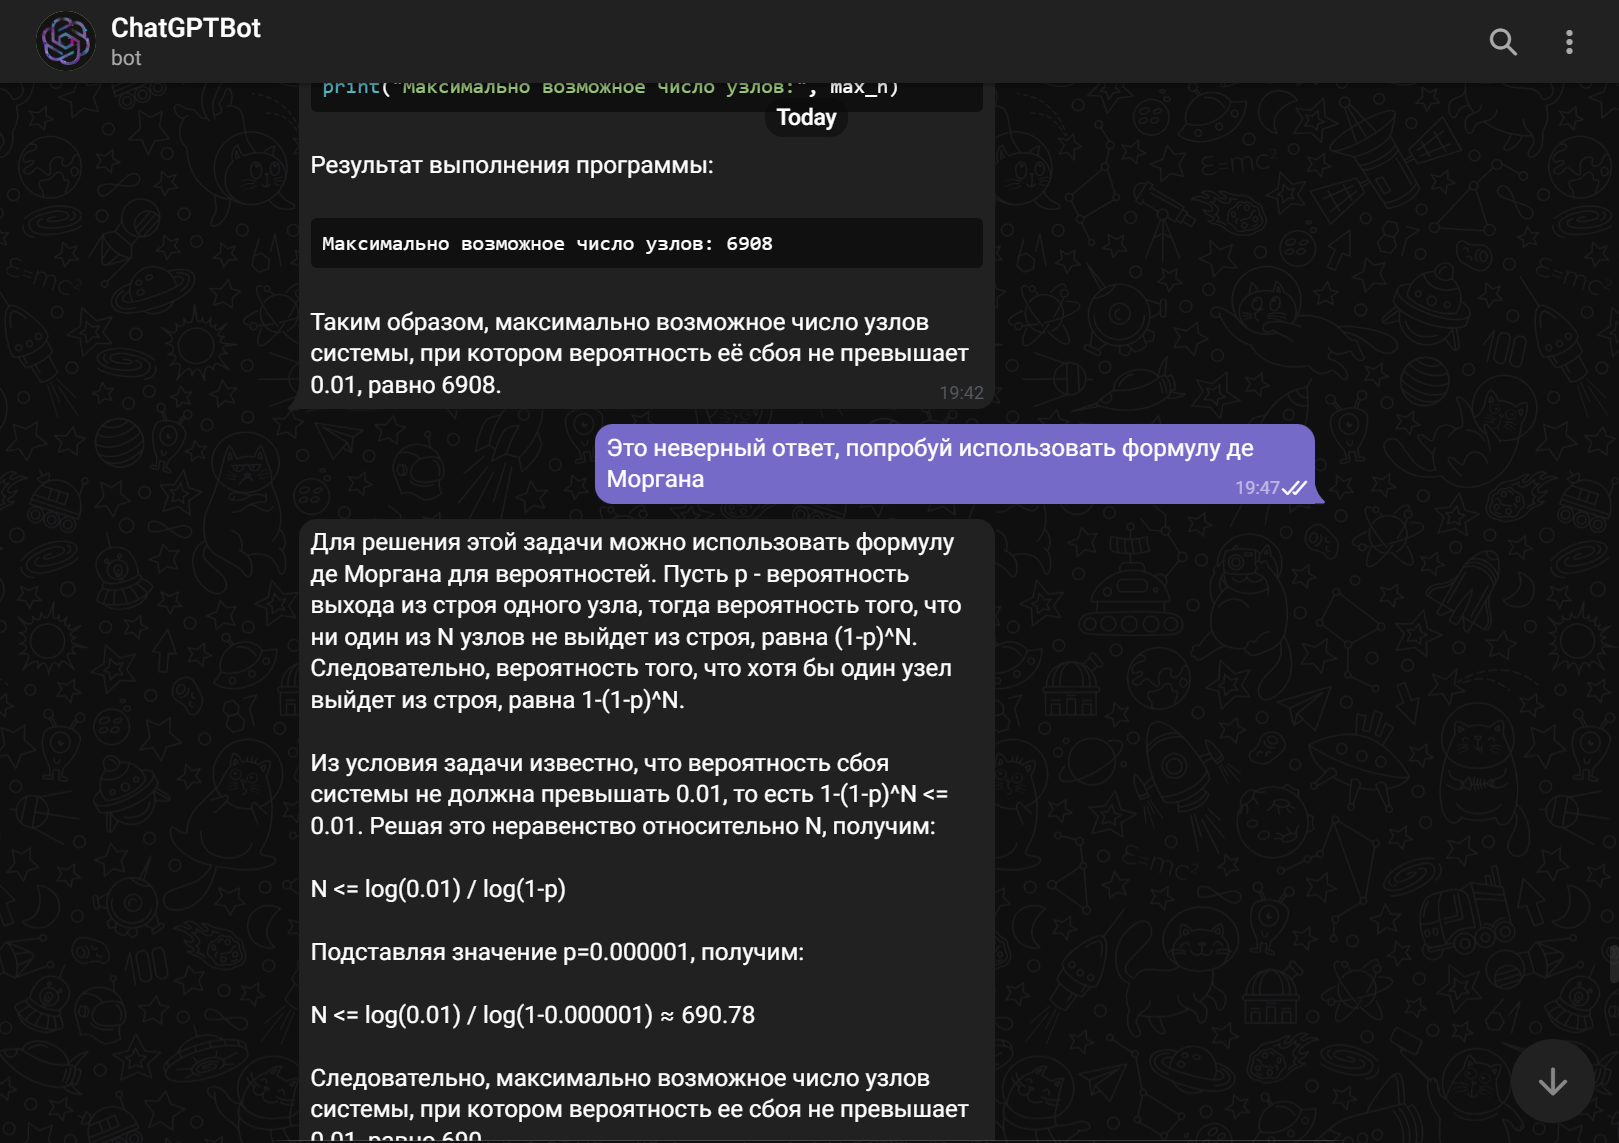

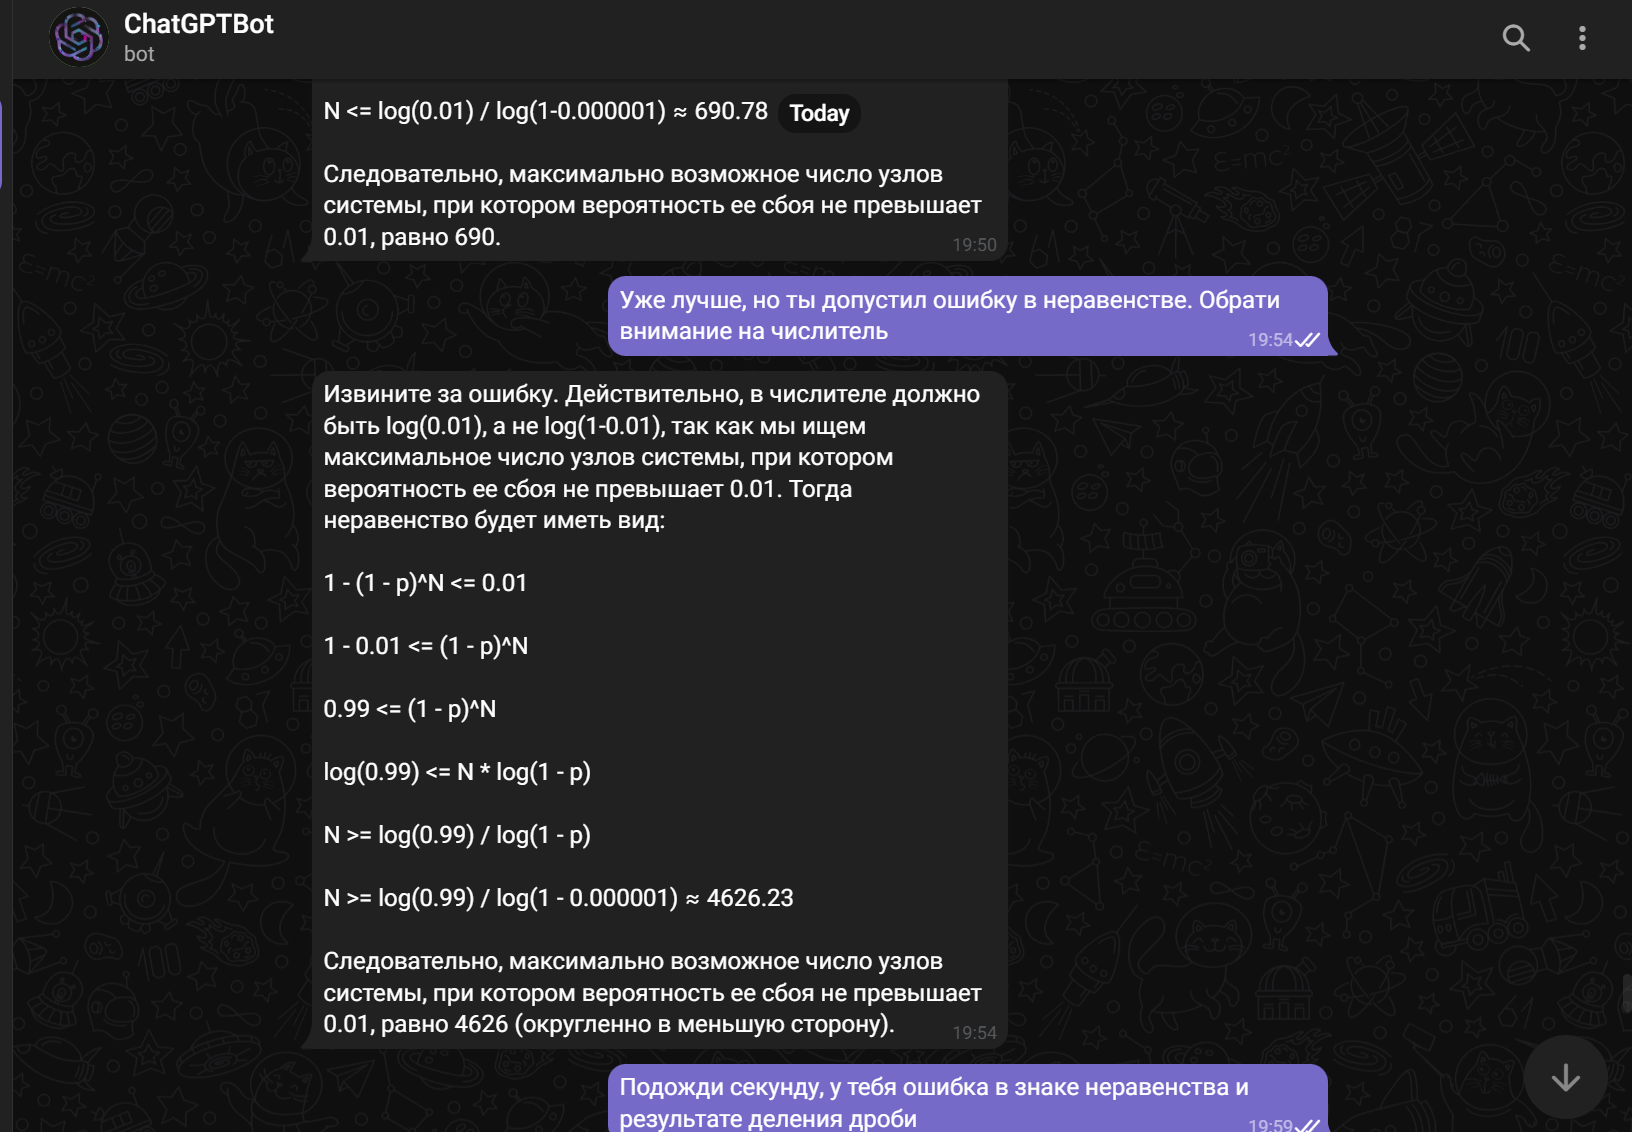

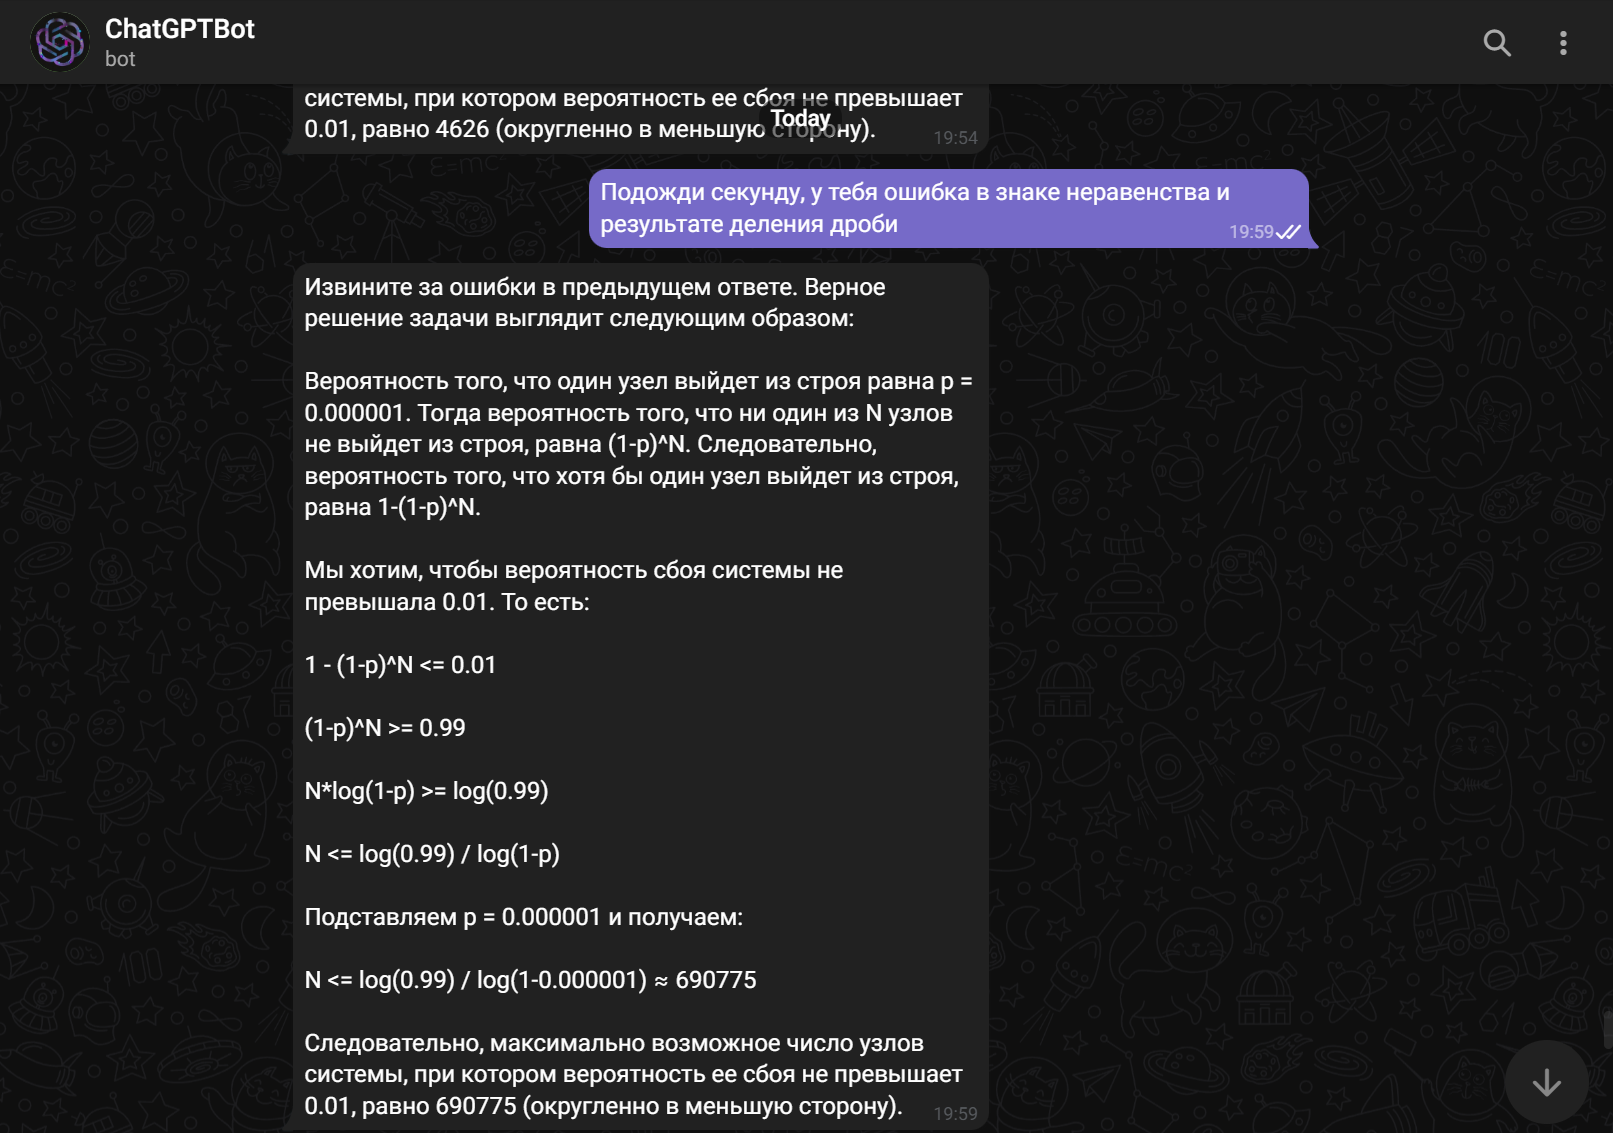

Дальше я долго и упорно втолковываю ему, как найти значение той дроби, но он так и не понял. Но само решение правильное, если ввести эту дробь в калькулятор, будет 1050, что верно.

# №8

http://www.mathprofi.ru/ - Ресурс, полезный не только для ТВиМС, но и для математических курсов в целом. Все статьи написаны простым языком, с примерами, довольно кратко. Идеально для повторения или даже быстрого наверсывания программы. Разумеется, информация там скорее практико-ориентированная, без углубления в теорию, поэтому ресурс скорее вспомогательный, но оттого не менее полезный.